In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap


def get_exp_ids(corpus='amazon_grouped-tagged'):
    # curve when varying k
    query_dict = {'expansions__decode_handler': 'SignifierSignifiedFeatureHandler'}
    return Experiment.objects.filter(**query_dict).values_list('id', flat=True)

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


ids are [43, 44, 45, 46]
Calculating CI for exp 43
Calculating CI for exp 44
Calculating CI for exp 45
Calculating CI for exp 46
Accuracy has 2000 values
folds has 2000 values
Algorithm has 2000 values
Composer has 2000 values


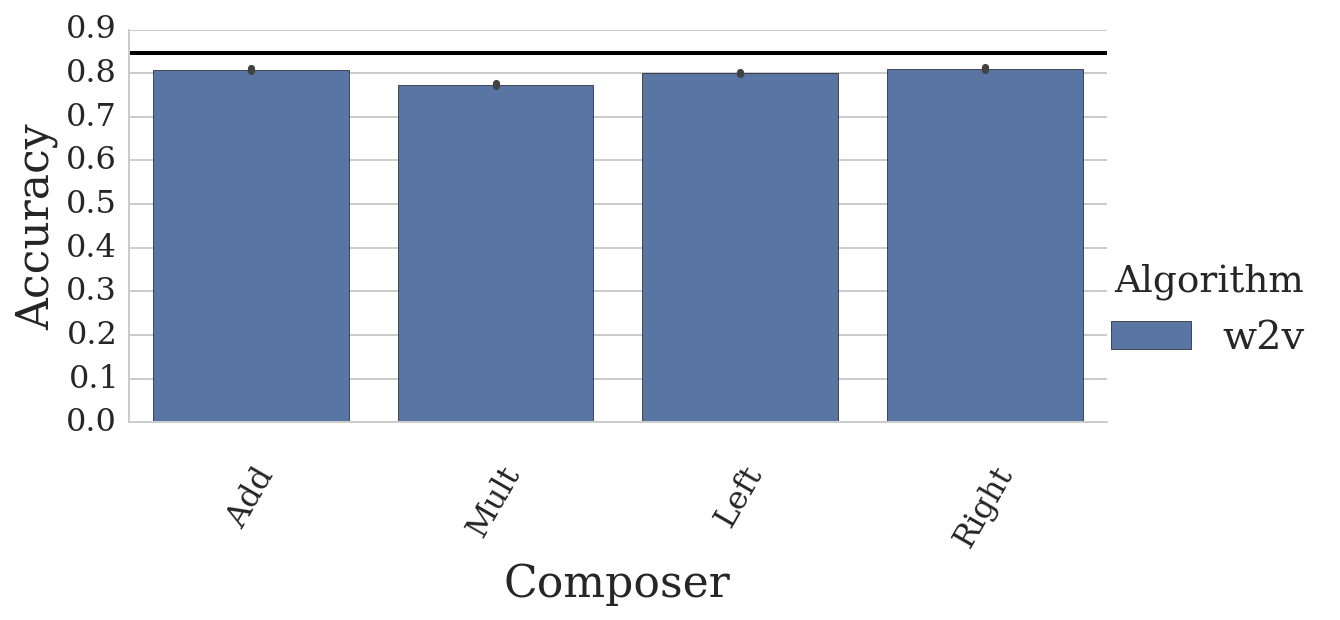

In [2]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

ids = get_exp_ids()
print('ids are', ids)
df = dataframe_from_exp_ids(ids, {'Algorithm':'expansions__vectors__algorithm', 
                                  'Composer':'expansions__vectors__composer'})
grid = sns.factorplot(hue='Algorithm', y='Accuracy', data=df, x='Composer',
                      kind='bar', aspect=2, ci=68);
grid.set_xticklabels(rotation=60);
plt.axhline(nondistributional_baseline(), c='k')
plt.savefig('plot-w2v-turian-hybrid.pdf', format='pdf', dpi=300)

In [3]:
print(df.groupby('Composer').Accuracy.mean().to_frame().sort('Accuracy').to_latex())

\begin{tabular}{lr}
\toprule
{} &  Accuracy \\
\midrule
Composer &           \\
Mult     &  0.773794 \\
Left     &  0.800304 \\
Add      &  0.808208 \\
Right    &  0.810090 \\
\bottomrule
\end{tabular}



In [ ]:
nondisco = Experiment.objects.get(expansions__decode_handler='BaseFeatureHandler', 
                                  labelled='amazon_grouped-tagged',
                                 document_features_tr='J+N+AN+NN', 
                                  document_features_ev='AN+NN').id
for eid in list(ids.values_list('id', flat=True)) + [nondisco]:
    exp = Experiment.objects.get(id=eid)
    mean, low, high, _ = get_ci(eid)
    try:
        print('%s & %.2f$\pm$%.2f \\\\'%(exp.expansions.vectors.composer, mean, (high-low)/2))
    except:
        print('Nondisco & %.2f$\pm$%.2f \\\\'%(mean, (high-low)/2))

Add & 0.81$\pm$0.01 \\
Mult & 0.77$\pm$0.01 \\
Left & 0.80$\pm$0.01 \\
Right & 0.81$\pm$0.01 \\
Calculating CI for exp 5
